In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data=pd.read_csv('matches.csv')
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
data.shape

(636, 18)

In [4]:
data.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
data.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
data.drop(['umpire3'],axis=1,inplace=True)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               636 non-null    int64 
 1   season           636 non-null    int64 
 2   city             629 non-null    object
 3   date             636 non-null    object
 4   team1            636 non-null    object
 5   team2            636 non-null    object
 6   toss_winner      636 non-null    object
 7   toss_decision    636 non-null    object
 8   result           636 non-null    object
 9   dl_applied       636 non-null    int64 
 10  winner           633 non-null    object
 11  win_by_runs      636 non-null    int64 
 12  win_by_wickets   636 non-null    int64 
 13  player_of_match  633 non-null    object
 14  venue            636 non-null    object
 15  umpire1          635 non-null    object
 16  umpire2          635 non-null    object
dtypes: int64(5), object(12)
memory usag

# Cleaning

In [9]:
Teams={
    'Royal Challengers Bangalore':'RCB', 
    'Sunrisers Hyderabad':'SRH',
       'Rising Pune Supergiant':'RPS',
    'Mumbai Indians':'MI',
       'Kolkata Knight Riders':'KKR', 
    'Gujarat Lions':'GL',
    'Kings XI Punjab':'KXIP',
       'Delhi Daredevils':'DD',
    'Chennai Super Kings':'CSK',
    'Rajasthan Royals':'RR',
       'Deccan Chargers':'DC',
    'Kochi Tuskers Kerala':'KTK',
    'Pune Warriors':'PW',
       'Rising Pune Supergiants':'RPS'
}

In [10]:
data['team1']=data['team1'].map(Teams)
data['team2']=data['team2'].map(Teams)
data['toss_winner']=data['toss_winner'].map(Teams)
data['winner']=data['winner'].map(Teams)

In [11]:
data['team1'].unique()

array(['SRH', 'MI', 'GL', 'RPS', 'RCB', 'KKR', 'DD', 'KXIP', 'CSK', 'RR',
       'DC', 'KTK', 'PW'], dtype=object)

In [12]:
data.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,4/5/2017,SRH,RCB,RCB,field,normal,0,SRH,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,4/6/2017,MI,RPS,RPS,field,normal,0,RPS,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,4/8/2017,RPS,KXIP,KXIP,field,normal,0,KXIP,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,4/8/2017,RCB,DD,RCB,bat,normal,0,RCB,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


# Unique Values

In [14]:
data['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016],
      dtype=int64)

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


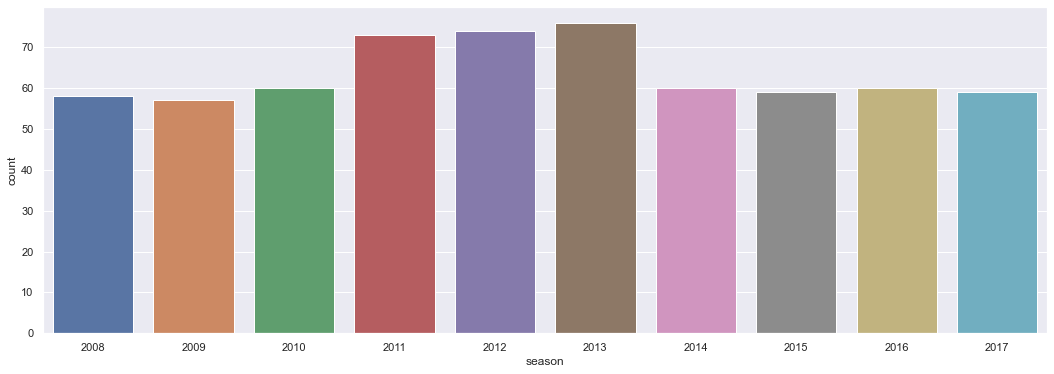

In [19]:
plt.figure(figsize=(18,6))
sns.countplot(data['season'])

In [23]:
data['toss_decision'].value_counts()

field    363
bat      273
Name: toss_decision, dtype: int64

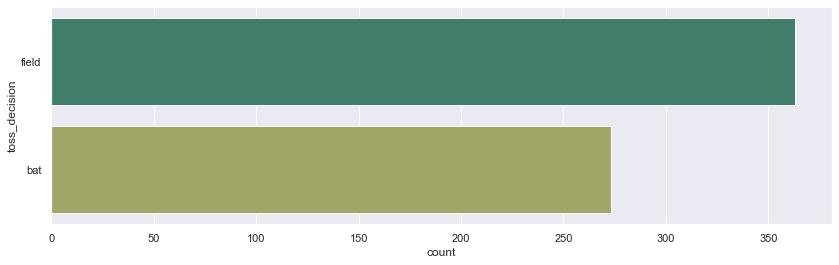

In [37]:
plt.figure(figsize=(14,4))
sns.countplot(y=data['toss_decision'],palette='gist_earth')

In [46]:
data['result'].value_counts()

normal       626
tie            7
no result      3
Name: result, dtype: int64

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


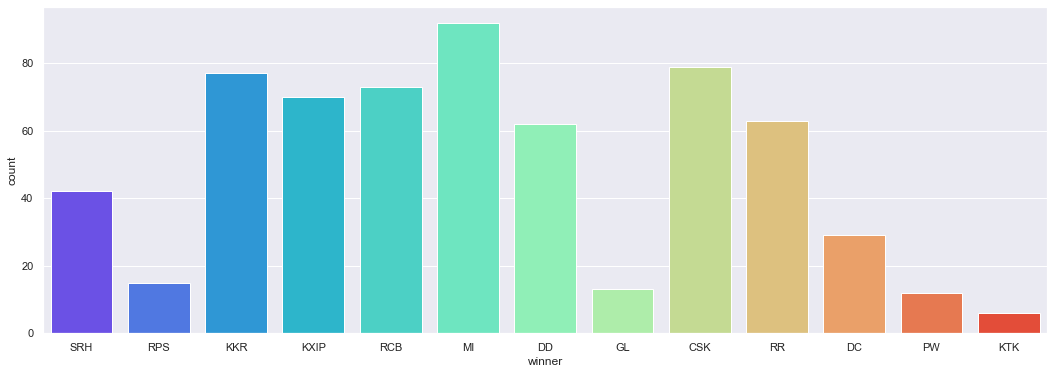

In [64]:
plt.figure(figsize=(18,6))
sns.countplot(data['winner'],palette='rainbow')

In [75]:
data['player_of_match'].unique()

array(['Yuvraj Singh', 'SPD Smith', 'CA Lynn', 'GJ Maxwell', 'KM Jadhav',
       'Rashid Khan', 'N Rana', 'AR Patel', 'SV Samson', 'JJ Bumrah',
       'SP Narine', 'KA Pollard', 'AJ Tye', 'RV Uthappa', 'CJ Anderson',
       'BA Stokes', 'NM Coulter-Nile', 'B Kumar', 'CH Gayle',
       'KS Williamson', 'JC Buttler', 'SK Raina', 'MJ McClenaghan',
       'MS Dhoni', 'HM Amla', 'G Gambhir', 'LH Ferguson', 'KH Pandya',
       'Sandeep Sharma', 'DA Warner', 'RG Sharma', 'Mohammed Shami',
       'RA Tripathi', 'RR Pant', 'JD Unadkat', 'LMP Simmons', 'DR Smith',
       'S Dhawan', 'MM Sharma', 'SS Iyer', 'WP Saha', 'KK Nair',
       'Mohammed Siraj', 'AT Rayudu', 'HV Patel', 'Washington Sundar',
       'KV Sharma', 'BB McCullum', 'MEK Hussey', 'MF Maharoof',
       'MV Boucher', 'DJ Hussey', 'SR Watson', 'V Sehwag', 'ML Hayden',
       'YK Pathan', 'KC Sangakkara', 'JDP Oram', 'AC Gilchrist',
       'SM Katich', 'ST Jayasuriya', 'GD McGrath', 'SE Marsh',
       'SA Asnodkar', 'R Vinay Kumar', 

In [76]:
data['venue'].value_counts()

M Chinnaswamy Stadium                                   66
Eden Gardens                                            61
Feroz Shah Kotla                                        60
Wankhede Stadium                                        57
Rajiv Gandhi International Stadium, Uppal               49
MA Chidambaram Stadium, Chepauk                         48
Punjab Cricket Association Stadium, Mohali              35
Sawai Mansingh Stadium                                  33
Dr DY Patil Sports Academy                              17
Subrata Roy Sahara Stadium                              17
Maharashtra Cricket Association Stadium                 15
Kingsmead                                               15
Sardar Patel Stadium, Motera                            12
SuperSport Park                                         12
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium     11
Punjab Cricket Association IS Bindra Stadium, Mohali    11
Brabourne Stadium                                       

In [83]:
data['umpire1'].value_counts()

HDPK Dharmasena          73
Asad Rauf                51
AK Chaudhary             43
Aleem Dar                38
BF Bowden                37
S Ravi                   36
BR Doctrove              34
M Erasmus                32
RE Koertzen              20
S Asnani                 19
JD Cloete                16
CB Gaffaney              14
BG Jerling               13
AY Dandekar              13
NJ Llong                 12
A Nand Kishore           11
KN Ananthapadmanabhan    11
SS Hazare                11
Nitin Menon              11
VA Kulkarni              11
RK Illingworth           11
MR Benson                10
S Das                    10
K Hariharan              10
DJ Harper                 9
BNJ Oxenford              7
IL Howell                 7
GAV Baxter                7
RM Deshpande              7
SJ Davis                  6
C Shamshuddin             6
SD Fry                    5
CK Nandan                 5
SK Tarapore               5
YC Barde                  4
K Bharatan          

# Min Max Avg Median Values in the data

In [86]:
data[data['win_by_runs']==data['win_by_runs'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,5/6/2017,MI,DD,DD,field,normal,0,MI,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [87]:
data[data['win_by_wickets']==data['win_by_wickets'].max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,4/7/2017,GL,KKR,KKR,field,normal,0,KKR,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,4/30/2017,DD,KXIP,KXIP,field,normal,0,KXIP,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,4/27/2008,MI,DC,DC,field,normal,0,DC,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,4/19/2009,KXIP,DD,DD,field,normal,1,DD,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,3/18/2010,RR,RCB,RCB,field,normal,0,RCB,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,5/20/2011,MI,RR,MI,bat,normal,0,RR,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,5/20/2012,RR,MI,RR,bat,normal,0,MI,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,4/10/2013,KXIP,CSK,CSK,field,normal,0,CSK,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,4/26/2015,DD,RCB,RCB,field,normal,0,RCB,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,4/21/2016,GL,SRH,SRH,field,normal,0,SRH,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


In [88]:
len(data[data['win_by_wickets']==data['win_by_wickets'].max()])

10

In [89]:
data['toss_winner'].value_counts()

MI      85
KKR     78
DD      72
RCB     70
KXIP    68
CSK     66
RR      63
DC      43
SRH     35
PW      20
GL      15
RPS     13
KTK      8
Name: toss_winner, dtype: int64

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


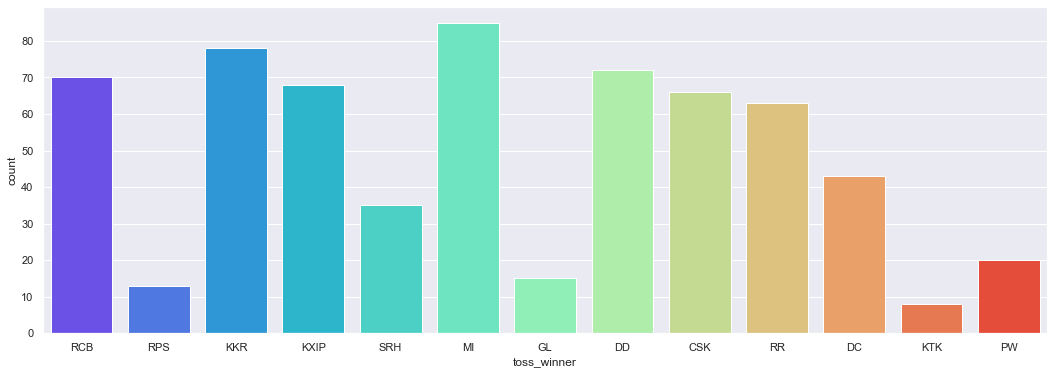

In [92]:
plt.figure(figsize=(18,6))
sns.countplot(data['toss_winner'],palette='rainbow')

C:\Users\sampa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


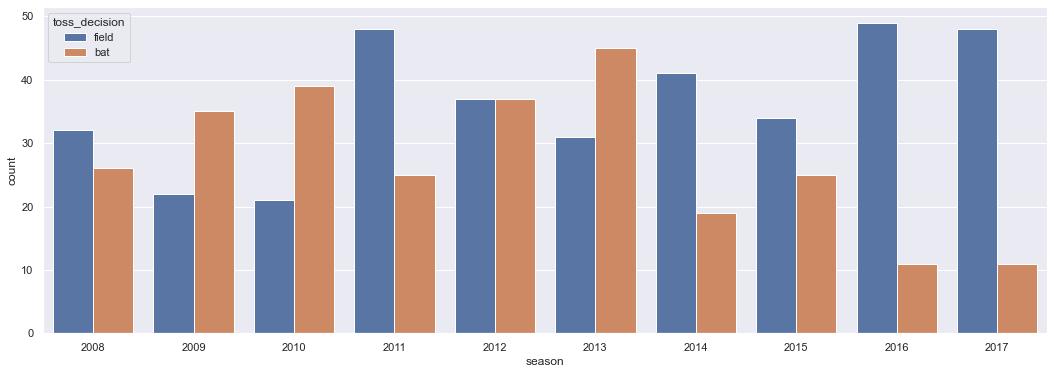

In [94]:
plt.figure(figsize=(18,6))
sns.countplot('season',hue='toss_decision',data=data)

In [97]:
matches_played_between=pd.concat([data['team1'],data['team2']],axis=1)
matches_played_between

,team1,team2
0,SRH,RCB
1,MI,RPS
2,GL,KKR
3,RPS,KXIP
4,RCB,DD
...,...,...
631,DD,RCB
632,GL,RCB
633,SRH,KKR
634,GL,SRH


In [101]:
matches_played_between['team1'].value_counts()

MI      82
KXIP    77
CSK     77
RCB     70
KKR     68
DD      63
RR      54
SRH     46
DC      43
PW      20
RPS     15
GL      14
KTK      7
Name: team1, dtype: int64

In [102]:
matches_played_between['team2'].value_counts()

DD      84
RCB     82
KKR     80
MI      75
KXIP    71
RR      64
CSK     54
DC      32
SRH     30
PW      26
GL      16
RPS     15
KTK      7
Name: team2, dtype: int64

In [99]:
teams=(matches_played_between['team1'].value_counts()+matches_played_between['team2'].value_counts()).reset_index()
teams.columns=['team_name','matches_played']
teams

,team_name,matches_played
0,CSK,131
1,DC,75
2,DD,147
3,GL,30
4,KKR,148
5,KTK,14
6,KXIP,148
7,MI,157
8,PW,46
9,RCB,152


In [104]:
wins=pd.DataFrame(data['winner'].value_counts()).reset_index()
wins.columns=['team_name','wins']
wins

,team_name,wins
0,MI,92
1,CSK,79
2,KKR,77
3,RCB,73
4,KXIP,70
5,RR,63
6,DD,62
7,SRH,42
8,DC,29
9,RPS,15


In [111]:
ipl_teams=teams.merge(wins,left_on='team_name',right_on='team_name',how='inner')
ipl_teams.columns=['team','matches_played','wins']
ipl_teams['win %']=(ipl_teams['wins']/ipl_teams['matches_played'])*100
ipl_teams

,team,matches_played,wins,win %
0,CSK,131,79,60.305344
1,DC,75,29,38.666667
2,DD,147,62,42.176871
3,GL,30,13,43.333333
4,KKR,148,77,52.027027
5,KTK,14,6,42.857143
6,KXIP,148,70,47.297297
7,MI,157,92,58.598726
8,PW,46,12,26.086957
9,RCB,152,73,48.026316
